Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE: 100%|██████████| 10000/10000 [00:19<00:00, 517.13image/s]
Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL: 100%|██████████| 10000/10000 [00:18<00:00, 528.78image/s]
Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE: 100%|██████████| 50000/50000 [01:54<00:00, 436.73image/s]
Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL: 100%|██████████| 50000/50000 [01:10<00:00, 707.87image/s]


Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE
Mean size (bytes): 924.10
Median size (bytes): 928.00
Std Dev (bytes): 64.68
Min size (bytes): 698
Max size (bytes): 1126
--------------------------------------------------
Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL
Mean size (bytes): 920.97
Median size (bytes): 924.00
Std Dev (bytes): 53.66
Min size (bytes): 697
Max size (bytes): 1102
--------------------------------------------------
Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE
Mean size (bytes): 924.52
Median size (bytes): 927.00
Std Dev (bytes): 64.76
Min size (bytes): 693
Max size (bytes): 1187
--------------------------------------------------
Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL
Mean size (bytes): 920.83
Median size (bytes): 924.00
Std Dev (bytes): 53.70
Min size (bytes): 692
Max size (bytes): 1124
---------------------------------

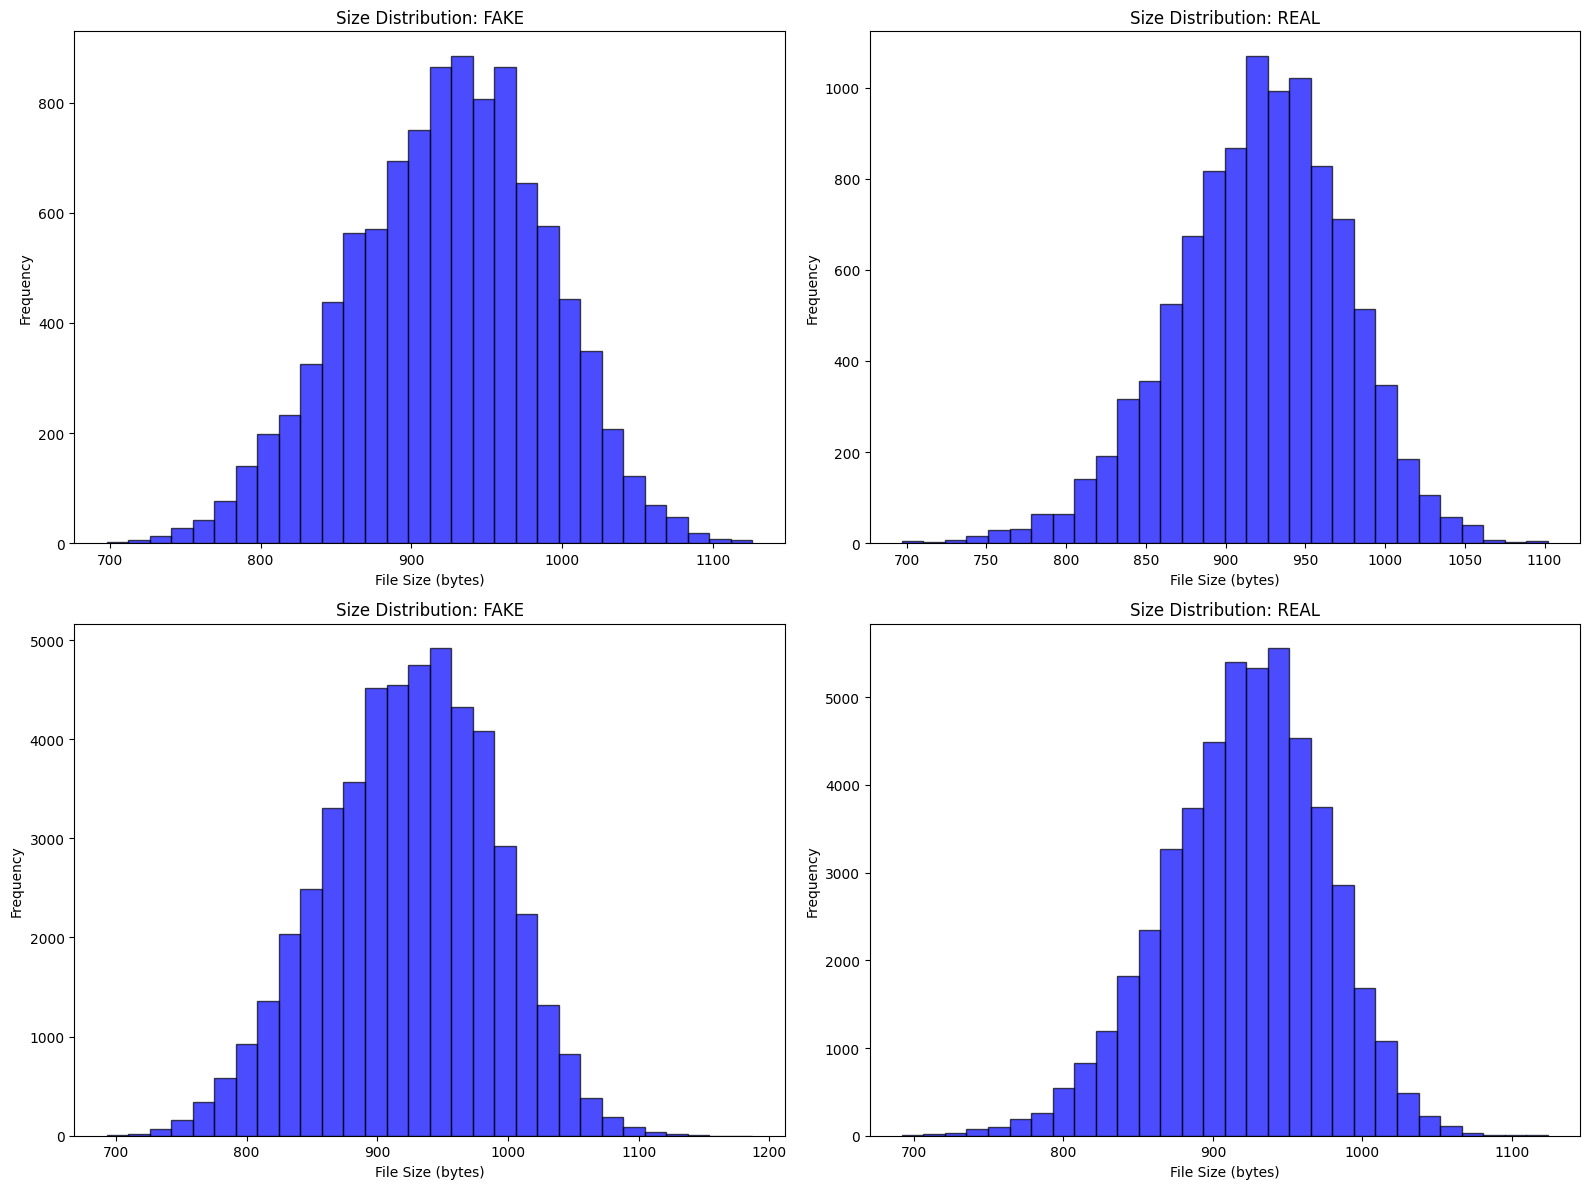

Overall Stats:
Mean size (bytes): 922.65
Median size (bytes): 926.00
Std Dev (bytes): 59.50
Min size (bytes): 692
Max size (bytes): 1187


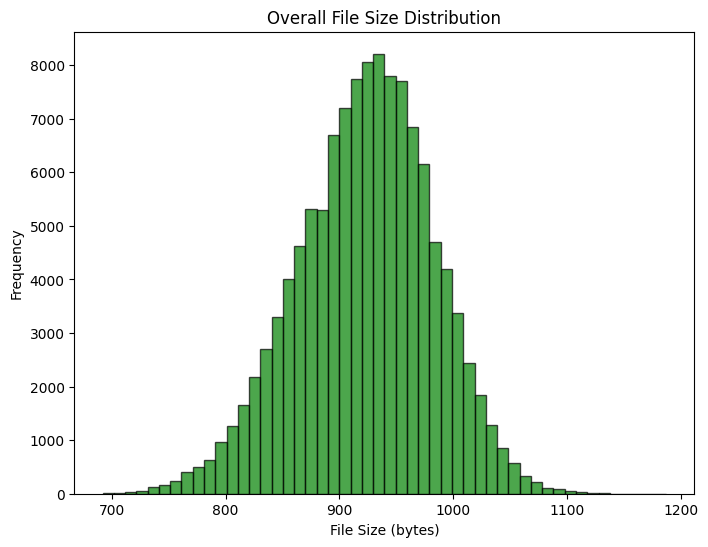

In [ ]:
# Link to project in Kaggle: https://www.kaggle.com/code/chellyahmed/aireal

import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Directories
directories = [
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE",
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL",
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE",
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL"
]

# Function to get image file sizes from metadata with progress bar
def get_image_sizes_from_metadata(directory):
    image_sizes = []
    files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]
    for file_name in tqdm(files, desc=f"Processing {directory}", unit="image"):
        file_path = os.path.join(directory, file_name)
        file_size = os.path.getsize(file_path)  # Get file size in bytes
        image_sizes.append(file_size)
    return image_sizes

# Function to calculate statistics
def calculate_stats(image_sizes):
    mean_size = np.mean(image_sizes)
    median_size = np.median(image_sizes)
    std_size = np.std(image_sizes)
    min_size = np.min(image_sizes)
    max_size = np.max(image_sizes)
    return mean_size, median_size, std_size, min_size, max_size

# Collect image sizes for all directories
sizes_dict = {}
for directory in directories:
    sizes = get_image_sizes_from_metadata(directory)
    sizes_dict[directory] = sizes

# Print stats and plot histograms for each directory
def plot_and_print_stats(sizes_dict):
    plt.figure(figsize=(16, 12))
    for i, (directory, sizes) in enumerate(sizes_dict.items(), 1):
        # Calculate statistics
        mean, median, std, min_size, max_size = calculate_stats(sizes)
        print(f"Directory: {directory}")
        print(f"Mean size (bytes): {mean:.2f}")
        print(f"Median size (bytes): {median:.2f}")
        print(f"Std Dev (bytes): {std:.2f}")
        print(f"Min size (bytes): {min_size}")
        print(f"Max size (bytes): {max_size}")
        print('-' * 50)
        
        # Plot histogram
        plt.subplot(2, 2, i)
        plt.hist(sizes, bins=30, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f"Size Distribution: {os.path.basename(directory)}")
        plt.xlabel("File Size (bytes)")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Print overall stats and plot overall distribution
def print_and_plot_overall_distribution(sizes_dict):
    all_sizes = np.concatenate(list(sizes_dict.values()))
    overall_mean, overall_median, overall_std, overall_min, overall_max = calculate_stats(all_sizes)
    print("Overall Stats:")
    print(f"Mean size (bytes): {overall_mean:.2f}")
    print(f"Median size (bytes): {overall_median:.2f}")
    print(f"Std Dev (bytes): {overall_std:.2f}")
    print(f"Min size (bytes): {overall_min}")
    print(f"Max size (bytes): {overall_max}")
    print('=' * 50)

    # Plot histogram for overall distribution
    plt.figure(figsize=(8, 6))
    plt.hist(all_sizes, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.title("Overall File Size Distribution")
    plt.xlabel("File Size (bytes)")
    plt.ylabel("Frequency")
    plt.show()

# Call functions to display results and plots
plot_and_print_stats(sizes_dict)
print_and_plot_overall_distribution(sizes_dict)


In [2]:
from PIL import Image

# Define target dimensions and format
target_size = (32, 32)
target_mode = "RGB"
target_extension = ".jpg"

# Initialize dictionary to store counts per directory
image_counts = {}

# Loop through each directory
for directory in directories:
    count = 0
    all_correct = True
    # Loop through each file in directory
    for filename in os.listdir(directory):
        if filename.lower().endswith(target_extension):
            # Open image and check properties
            filepath = os.path.join(directory, filename)
            try:
                with Image.open(filepath) as img:
                    if img.size == target_size and img.mode == target_mode:
                        count += 1
                    else:
                        all_correct = False
                        print(f"Incorrect dimensions or format in {filepath}")
            except Exception as e:
                print(f"Error opening image {filepath}: {e}")

    # Store count and print results
    image_counts[directory] = count
    print(f"{directory}: {count} images")
    if all_correct:
        print("All images are 32x32 pixels, RGB format, and .jpg in this directory.\n")
    else:
        print("Some images did not meet the specified criteria in this directory.\n")


/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE: 10000 images
All images are 32x32 pixels, RGB format, and .jpg in this directory.

/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL: 10000 images
All images are 32x32 pixels, RGB format, and .jpg in this directory.

/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE: 50000 images
All images are 32x32 pixels, RGB format, and .jpg in this directory.

/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL: 50000 images
All images are 32x32 pixels, RGB format, and .jpg in this directory.



In [3]:
import numpy as np

# Function to get image file sizes from metadata with progress bar
def get_image_sizes_from_metadata(directory):
    image_sizes = []
    files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]
    for file_name in tqdm(files, desc=f"Processing {directory}", unit="image"):
        file_path = os.path.join(directory, file_name)
        file_size = os.path.getsize(file_path)  # Get file size in bytes
        image_sizes.append(file_size)
    return image_sizes

# Store sizes per directory with progress bar
sizes_dict = {}
for directory in directories:
    sizes = get_image_sizes_from_metadata(directory)
    sizes_dict[directory] = sizes

# Function to calculate statistics
def calculate_stats(image_sizes):
    mean_size = np.mean(image_sizes)
    median_size = np.median(image_sizes)
    std_size = np.std(image_sizes)
    return mean_size, median_size, std_size

# Print stats per directory
for directory, sizes in sizes_dict.items():
    mean, median, std = calculate_stats(sizes)
    print(f"Directory: {directory}")
    print(f"Mean size (bytes): {mean:.2f}, Median size (bytes): {median:.2f}, Std Dev (bytes): {std:.2f}")
    print('-' * 50)

# Calculate and print overall stats
all_sizes = np.concatenate(list(sizes_dict.values()))
overall_mean, overall_median, overall_std = calculate_stats(all_sizes)
print("Overall Stats:")
print(f"Mean size (bytes): {overall_mean:.2f}, Median size (bytes): {overall_median:.2f}, Std Dev (bytes): {overall_std:.2f}")


Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE: 100%|██████████| 10000/10000 [00:05<00:00, 1830.07image/s]
Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL: 100%|██████████| 10000/10000 [00:05<00:00, 1703.29image/s]
Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE: 100%|██████████| 50000/50000 [00:28<00:00, 1779.25image/s]
Processing /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL: 100%|██████████| 50000/50000 [00:26<00:00, 1878.64image/s]

Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE
Mean size (bytes): 924.10, Median size (bytes): 928.00, Std Dev (bytes): 64.68
--------------------------------------------------
Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL
Mean size (bytes): 920.97, Median size (bytes): 924.00, Std Dev (bytes): 53.66
--------------------------------------------------
Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE
Mean size (bytes): 924.52, Median size (bytes): 927.00, Std Dev (bytes): 64.76
--------------------------------------------------
Directory: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL
Mean size (bytes): 920.83, Median size (bytes): 924.00, Std Dev (bytes): 53.70
--------------------------------------------------
Overall Stats:
Mean size (bytes): 922.65, Median size (bytes): 926.00, Std Dev (bytes): 59.50


In [4]:
import cv2
from sklearn.model_selection import train_test_split

# Define the directories
real_directories = [
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/REAL",
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL"
]
fake_directories = [
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test/FAKE",
    "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE"
]

# Target image size for model input
IMAGE_SIZE = (32, 32)  # Update to your model's input size if different

# Initialize empty lists to store images and labels
images = []
labels = []

# Load, resize, and normalize images, then assign labels
def load_images_dir(directories, label, images, labels):
    for dir_path in directories:
        for img_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMAGE_SIZE)  # Resize to target size
                img = img / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(label)

# Load real and fake images
load_images_dir(real_directories, 1, images, labels)
load_images_dir(fake_directories, 0, images, labels)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train[:5])


[1 1 0 0 0]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the CNN Model
model = Sequential()

# Convolutional layers with L2 regularization and dropout
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))  # Dropout after pooling

model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(16, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

# Fully connected layers with L2 regularization and dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,817 (1.22 MB)

 Trainable params: 320,817 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
)


Epoch 1/30


I0000 00:00:1733503549.770936      69 service.cc:145] XLA service 0x7a2ef00111e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733503549.771000      69 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  44/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4933 - loss: 1.6173

I0000 00:00:1733503560.234467      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6346 - loss: 1.2961 - val_accuracy: 0.8374 - val_loss: 0.7145
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8480 - loss: 0.6467 - val_accuracy: 0.8770 - val_loss: 0.4801
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8758 - loss: 0.4666 - val_accuracy: 0.9002 - val_loss: 0.3729
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8881 - loss: 0.3872 - val_accuracy: 0.9120 - val_loss: 0.3210
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9008 - loss: 0.3417 - val_accuracy: 0.8967 - val_loss: 0.3330
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9024 - loss: 0.3235 - val_accuracy: 0.9212 - val_loss: 0.2774
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9092 - loss: 0.3022 - val_accuracy: 0.9194 - val_loss: 0.2700
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9114 - loss: 0.2910 - val_accura

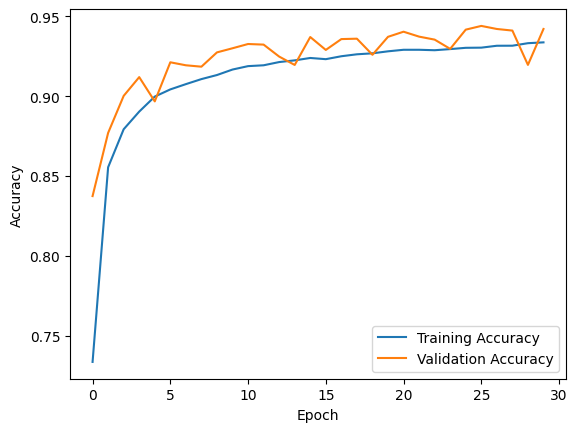

In [7]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model (if not already loaded)
# model = load_model('your_model.h5')  # Uncomment this if the model isn't already loaded

# Load and preprocess your custom image
img_path = '/kaggle/input/birdsbirds/i3.jpg'  # Path to your custom image
img = image.load_img(img_path, target_size=(32, 32))  # Resize image (adjust to your input size)

# Convert the image to a numpy array and normalize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize if your model expects input between [0, 1]

# Make a prediction (outputs a probability between 0 and 1 for binary classification)
prediction = model.predict(img_array)
print(prediction) # 1 is real


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
[[0.99148154]]


In [9]:
import os
import cv2
import numpy as np

# Set the directory for your images
#image_dir = '/kaggle/input/fakess'
image_dir = '/kaggle/input/fakess'
# Load, preprocess, and predict on each image
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    
    # Load the image (adjust the dimensions if needed)
    image = cv2.imread(image_path)
    image = image / 255.0  # Normalize if required by your model
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(image)
    
    # Print the result
    print(f"Prediction for {image_name}: {prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for fake5.jpg: 0.00974525697529316
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for fake8.jpg: 0.01221549604088068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction for fake4.jpg: 0.01361833792179823
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction for fake1.jpg: 0.33065831661224365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction for fake3.jpg: 0.08898869156837463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction for fake6.jpg: 0.013639966025948524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction for fake2.jpg: 0.274081826210022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for fake7.jpg: 0.11928633600473404


In [10]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Assuming a binary classification problem

# Calculate metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Alternatively, calculate individual metrics if needed:
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11799
           1       0.92      0.97      0.94     12201

    accuracy                           0.94     24000
   macro avg       0.94      0.94      0.94     24000
weighted avg       0.94      0.94      0.94     24000

Precision: 0.92
Recall: 0.97
F1 Score: 0.94


750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


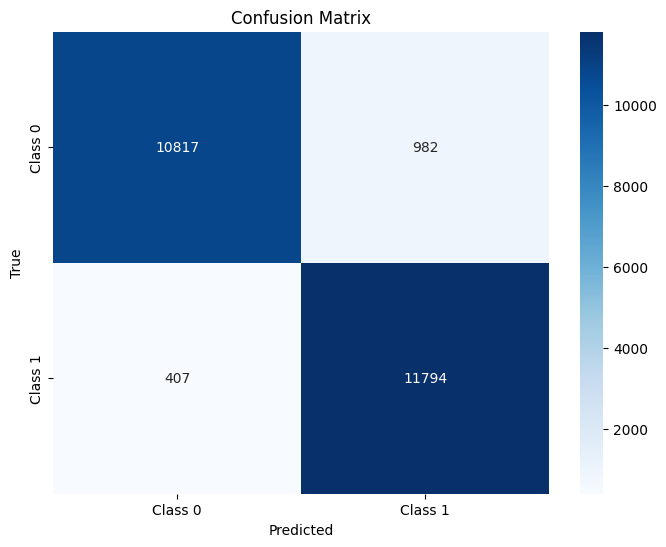

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Binary classification thresholding

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
